In [81]:
import numpy as np
import pandas as pd

import nltk #provides a set of diverse algorithm of NLP
from nltk.corpus import stopwords #read a corpus files in variety of formats
import string


import seaborn as sns

import matplotlib.pyplot as plt


In [82]:
#reading the data

df = pd.read_csv('C:\\Users\\NACL\\Desktop\\python\\Resume_Data.csv')
df['Cleaned_Resume'] = ''
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


Cleaned_Resume is created to keep the clean text.

In [83]:
print ("Resume Categories")
print (df['Category'].value_counts())

Resume Categories
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Category'>

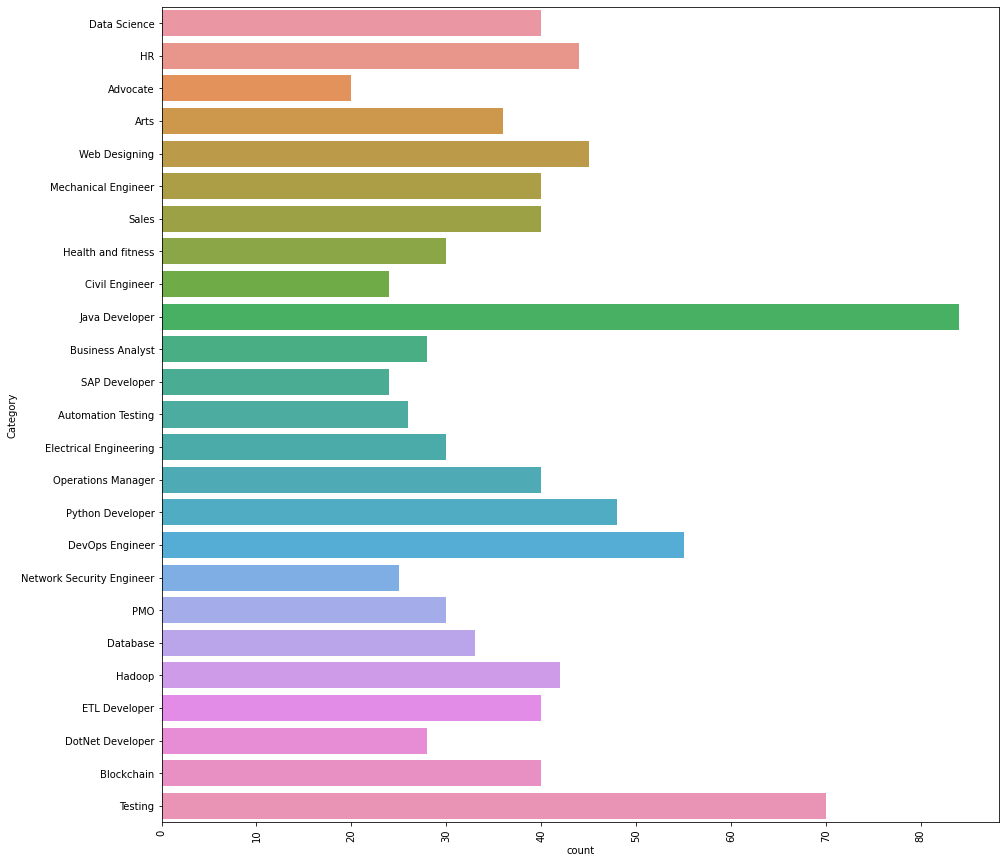

In [84]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=df)

In [85]:
df["Resume"][2]

'Areas of Interest Deep Learning, Control System Design, Programming in-Python, Electric Machinery, Web Development, Analytics Technical Activities q Hindustan Aeronautics Limited, Bangalore - For 4 weeks under the guidance of Mr. Satish, Senior Engineer in the hangar of Mirage 2000 fighter aircraft Technical Skills Programming Matlab, Python and Java, LabView, Python WebFrameWork-Django, Flask, LTSPICE-intermediate Languages and and MIPOWER-intermediate, Github (GitBash), Jupyter Notebook, Xampp, MySQL-Basics, Python Software Packages Interpreters-Anaconda, Python2, Python3, Pycharm, Java IDE-Eclipse Operating Systems Windows, Ubuntu, Debian-Kali Linux Education Details \r\nJanuary 2019 B.Tech. Electrical and Electronics Engineering  Manipal Institute of Technology\r\nJanuary 2015    DEEKSHA CENTER\r\nJanuary 2013    Little Flower Public School\r\nAugust 2000    Manipal Academy of Higher\r\nDATA SCIENCE \r\n\r\nDATA SCIENCE AND ELECTRICAL ENTHUSIAST\r\nSkill Details \r\nData Analysis-

As we can see the text needs a lot of processing. This is not suitable for analyzing

In [86]:
#We now have to clean the resume text.
#re--lets you check if a particular string matches a given regular expression
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
df['Cleaned_Resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [87]:
df.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


Now we see that the text is clean.

In [88]:
len(df)

962

In [89]:
#getting the entire Cleaned_Resume as single text.

corpus=" "

for i in range(0,962):
    corpus= corpus+ df["Cleaned_Resume"][i]

In [90]:
corpus[1000:2500]

'review process and run analytics and generate reports Core member of a team helped in developing automated review platform tool from scratch for assisting E discovery domain this tool implements predictive coding and topic modelling by automating reviews resulting in reduced labor costs and time spent during the lawyers review Understand the end to end flow of the solution doing research and development for classification models predictive analysis and mining of the information present in text data Worked on analyzing the outputs and precision monitoring for the entire tool TAR assists in predictive coding topic modelling from the evidence by following EY standards Developed the classifier models in order to identify red flags and fraud related issues Tools Technologies Python scikit learn tfidf word2vec doc2vec cosine similarity Na ve Bayes LDA NMF for topic modelling Vader and text blob for sentiment analysis Matplot lib Tableau dashboard for reporting MULTIPLE DATA SCIENCE AND ANAL

As the text has now been cleaned and joined together and is ready for document preprocessing methods.

## Tokenization
Tokenization is the process of breaking raw text into small units. Here, we convert the entire text into single words. Tokenization is important because it splits the data into small usable and easy-to-process units. These smaller units of text are called tokens. These tokens can help in understanding the context of the text and also in building the NLP models.


In [91]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

#Tokenizing the text
tokens = tokenizer.tokenize(corpus)

len(tokens)

411913

In [92]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

#Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

Here we have used word tokenization for our analyzing.

## POS Tagging
POS Tagging is a popular Natural Language Processing process which refers to categorizing word in a text (corpus) in correspondance with a particular part of speech, depending on the definition of the word and it's context.

In [93]:
import nltk
nltk.download('punkt')
words1 = nltk.word_tokenize(corpus)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NACL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [94]:
print(words1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [95]:
len(words1)

411913

In [96]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words1)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NACL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Skills', 'NNS'),
 ('Programming', 'VBG'),
 ('Languages', 'NNP'),
 ('Python', 'NNP'),
 ('pandas', 'VBZ'),
 ('numpy', 'JJ'),
 ('scipy', 'JJ'),
 ('scikit', 'NN'),
 ('learn', 'NN'),
 ('matplotlib', 'NN'),
 ('Sql', 'NNP'),
 ('Java', 'NNP'),
 ('JavaScript', 'NNP'),
 ('JQuery', 'NNP'),
 ('Machine', 'NNP'),
 ('learning', 'VBG'),
 ('Regression', 'NNP'),
 ('SVM', 'NNP'),
 ('Na', 'NNP'),
 ('ve', 'FW'),
 ('Bayes', 'NNP'),
 ('KNN', 'NNP'),
 ('Random', 'NNP'),
 ('Forest', 'NNP'),
 ('Decision', 'NNP'),
 ('Trees', 'NNP'),
 ('Boosting', 'NNP'),
 ('techniques', 'NNS'),
 ('Cluster', 'NNP'),
 ('Analysis', 'NNP'),
 ('Word', 'NNP'),
 ('Embedding', 'NNP'),
 ('Sentiment', 'NNP'),
 ('Analysis', 'NNP'),
 ('Natural', 'NNP'),
 ('Language', 'NNP'),
 ('processing', 'NN'),
 ('Dimensionality', 'NNP'),
 ('reduction', 'NN'),
 ('Topic', 'NNP'),
 ('Modelling', 'NNP'),
 ('LDA', 'NNP'),
 ('NMF', 'NNP'),
 ('PCA', 'NNP'),
 ('Neural', 'NNP'),
 ('Nets', 'NNP'),
 ('Database', 'NNP'),
 ('Visualizations', 'NNP'),
 ('Mysql', 'N

In [97]:
import nltk
nltk.download('tagsets')
nltk.help.brown_tagset()

(: opening parenthesis
    (
): closing parenthesis
    )
*: negator
    not n't
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ? ; ! :
:: colon
    :
ABL: determiner/pronoun, pre-qualifier
    quite such rather
ABN: determiner/pronoun, pre-quantifier
    all half many nary
ABX: determiner/pronoun, double conjunction or pre-quantifier
    both
AP: determiner/pronoun, post-determiner
    many other next more last former little several enough most least only
    very few fewer past same Last latter less single plenty 'nough lesser
    certain various manye next-to-last particular final previous present
    nuf
AP$: determiner/pronoun, post-determiner, genitive
    other's
AP+AP: determiner/pronoun, post-determiner, hyphenated pair
    many-much
AT: article
    the an no a every th' ever' ye
BE: verb 'to be', infinitive or imperative
    be
BED: verb 'to be', past tense, 2nd person singular or all persons plural
    were
BED*: verb 'to be', past tense, 2nd person singular or 

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\NACL\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [98]:
import nltk
nltk.download('tagsets')
nltk.help.upenn_tagset('NNP')

NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...


[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\NACL\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


## Stop words removal
For analyzing text and NLP, stopwords are removed from the text, as they do not add much value and meaning to the text. Stopwords, if added would bring in a lot of unnecessary noise and be of no use to the analytics process. Also, the removal of stopwords reduces the amount of data we have to process, thus reducing the number of tokens and makes everything faster.

Examples of Stopwords in English: ‘nor’, ‘me’, ‘were’, ‘her’, ‘more’, ‘himself’, ‘this’.

In [ ]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in stopwords

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [ ]:
len(words_new)

## Stemming and Lemmatization
Stemming just removes the last few characters of a word, often leading incorrect meanings and spelling.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analysed as a single item.

Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. 

Lemmatization is preferred over Stemming because lemmatization does morphological analysis of the words.

In [ ]:
import nltk
nltk.download('omw-1.4')
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
  
wn = WordNetLemmatizer() 

lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [ ]:
same=0
diff=0

for i in range(0,1832):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1
        
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)





Now, with the Lemmatization done, we proceed to get the Frequency Distribution.